<a href="https://colab.research.google.com/github/Fvidal101/Tech-Academy-Test/blob/master/Diabetes_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()
# checking for missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.dtypes # gives the information about the data type (data representation)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# picking the variables from the dataset 
data = data[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']] # these are the variables, which will are the independednt variables

# chagning of datatype, i.e., from float to int
data['Outcome'] = data['Outcome'].astype('int')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape # information about the quantity of rows & columns

(768, 9)

In [ ]:

x = np.asarray(data[['Pregnancies',	'Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']]) # independent variable/features
y = np.asarray(data['Outcome']) # dependent variable (label)

# printing the values of X and Y
print(x [0:5])

print(y [0:5])

[[  6.  148.   72.   35.    0.   33.6]
 [  1.   85.   66.   29.    0.   26.6]
 [  8.  183.   64.    0.    0.   23.3]
 [  1.   89.   66.   23.   94.   28.1]
 [  0.  137.   40.   35.  168.   43.1]]
[1 0 1 0 1]


In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 6) (614,)
Test set: (154, 6) (154,)


In [ ]:
 # developing ML model: Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
model


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y = model.predict(x_test)
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# predict probability

y_prob = model.predict_proba(x_test)
y_prob

#array[[a,b]] : 'a' shows class 0 and 'b' shows class 1

array([[0.67050029, 0.32949971],
       [0.7023805 , 0.2976195 ],
       [0.76766045, 0.23233955],
       [0.760163  , 0.239837  ],
       [0.76927935, 0.23072065],
       [0.52853159, 0.47146841],
       [0.53742027, 0.46257973],
       [0.34178978, 0.65821022],
       [0.25333137, 0.74666863],
       [0.57248446, 0.42751554],
       [0.83250978, 0.16749022],
       [0.7955042 , 0.2044958 ],
       [0.84979862, 0.15020138],
       [0.8132457 , 0.1867543 ],
       [0.6972638 , 0.3027362 ],
       [0.68940468, 0.31059532],
       [0.47038131, 0.52961869],
       [0.59889883, 0.40110117],
       [0.80855859, 0.19144141],
       [0.81981154, 0.18018846],
       [0.76486101, 0.23513899],
       [0.41876744, 0.58123256],
       [0.60481192, 0.39518808],
       [0.6012645 , 0.3987355 ],
       [0.53396392, 0.46603608],
       [0.79977289, 0.20022711],
       [0.68703691, 0.31296309],
       [0.18021359, 0.81978641],
       [0.83320881, 0.16679119],
       [0.64056742, 0.35943258],
       [0.

[[16 36]
 [12 90]]
Confusion matrix, without normalization
[[16 36]
 [12 90]]


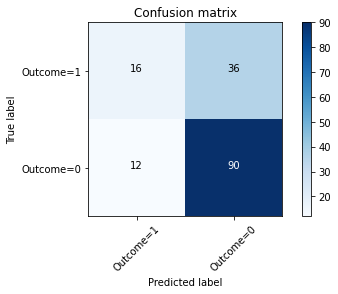

In [ ]:
#Plotting confusion matrix
#Code reference: IBM ML0101EN

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, Y, labels=[1,0]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, Y, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Outcome=1','Outcome=0'],normalize= False,  title='Confusion matrix')

In [ ]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
target_names = ['class 0', 'class 1']

results = confusion_matrix(y_test,Y)
print('Confusion Matrix :')
print(results) 

print('Accuracy Score :',accuracy_score(y_test, Y))

print(classification_report(y_test, Y, target_names=target_names))

Confusion Matrix :
[[90 12]
 [36 16]]
Accuracy Score : 0.6883116883116883
              precision    recall  f1-score   support

     class 0       0.71      0.88      0.79       102
     class 1       0.57      0.31      0.40        52

    accuracy                           0.69       154
   macro avg       0.64      0.60      0.59       154
weighted avg       0.67      0.69      0.66       154

